<a href="https://colab.research.google.com/github/afham123/Task-2/blob/main/Skill_geeks_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
file=files.upload()

Saving breast-cancer-wisconsin.data.csv to breast-cancer-wisconsin.data.csv
Saving breast-cancer-wisconsin.names.txt to breast-cancer-wisconsin.names.txt


In [3]:
with open('breast-cancer-wisconsin.names.txt') as f:
  description=f.read()
print(description)

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

In [4]:
df=pd.read_csv('breast-cancer-wisconsin.data.csv')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [5]:
df.columns

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')

In [6]:
df.rename(columns={'1000025':"id number" ,'5':"Clump Thickness" ,'1':"Uniformity of cell Size" ,'1.1':"Uniformity of cell Shape" , '1.2':"Marginal Adhesion",
                   '2':"Single Epithelial Cell Size" , '1.3':"Bare Nuclei" , '3':"Bland  Chromatin" , '1.4':"Normal Nucleoli" , '1.5':"Mitoses" ,
                   '2.1':"Class" },inplace=True)
df.head()

,id number,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id number                    698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of cell Size      698 non-null    int64 
 3   Uniformity of cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland  Chromatin             698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
df=df[df['Bare Nuclei']!='?']
df['Bare Nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '5', '8', '6'], dtype=object)

In [9]:
df.astype({'Bare Nuclei': 'int32'}).dtypes
df['Bare Nuclei'] = df['Bare Nuclei'].apply(pd.to_numeric)
df.columns

Index(['id number', 'Clump Thickness', 'Uniformity of cell Size',
       'Uniformity of cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland  Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [10]:
type(df['Bare Nuclei'][0])

numpy.int64

In [11]:
df['Class'].unique()

array([2, 4])

Applying Principal Component Analysis with n_component=2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


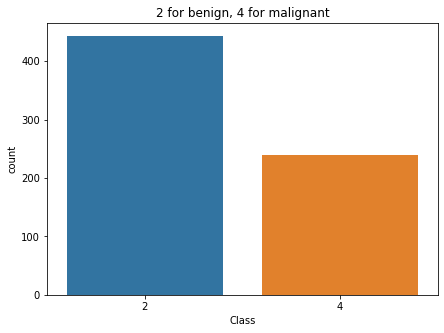

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title('2 for benign, 4 for malignant')
plt.show()

In [13]:
df['Class'].value_counts()

2    443
4    239
Name: Class, dtype: int64

In [14]:
df.drop('id number',axis=1,inplace=True)

In [15]:
df.describe()

,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,4.441349,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106,2.700880
std,2.822751,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792,0.954916
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [16]:
corr_mat=df.corr()

In [17]:
np.linalg.eig(corr_mat)

(array([6.73088308, 0.79332544, 0.54565456, 0.08795358, 0.12640299,
        0.46556433, 0.38053944, 0.26110591, 0.31262163, 0.29594905]),
 array([[-2.85684248e-01, -1.45794302e-01,  8.32782812e-01,
         -2.20648622e-02, -1.66154189e-01,  2.44707888e-03,
          6.74198404e-02, -2.52461422e-01, -3.21946090e-01,
         -5.97475505e-02],
        [-3.55240203e-01, -1.37116440e-02, -5.81007167e-02,
         -7.37435613e-01,  1.22586574e-02, -2.25383567e-01,
         -1.48136537e-01,  4.44853953e-01, -1.91719156e-01,
          1.37425170e-01],
        [-3.52725920e-01, -5.21878728e-02, -3.64250797e-03,
          6.49502498e-01, -1.95200764e-01, -2.00878253e-01,
         -1.10524249e-01,  5.82092137e-01, -1.14651858e-01,
          9.13606220e-02],
        [-3.09772468e-01, -1.83158769e-02, -4.07212228e-01,
          4.34935097e-02, -3.97734942e-03,  4.86000737e-01,
         -3.21474876e-02, -1.43058442e-01, -5.97238207e-01,
         -3.48693092e-01],
        [-3.11656907e-01,  1.96521

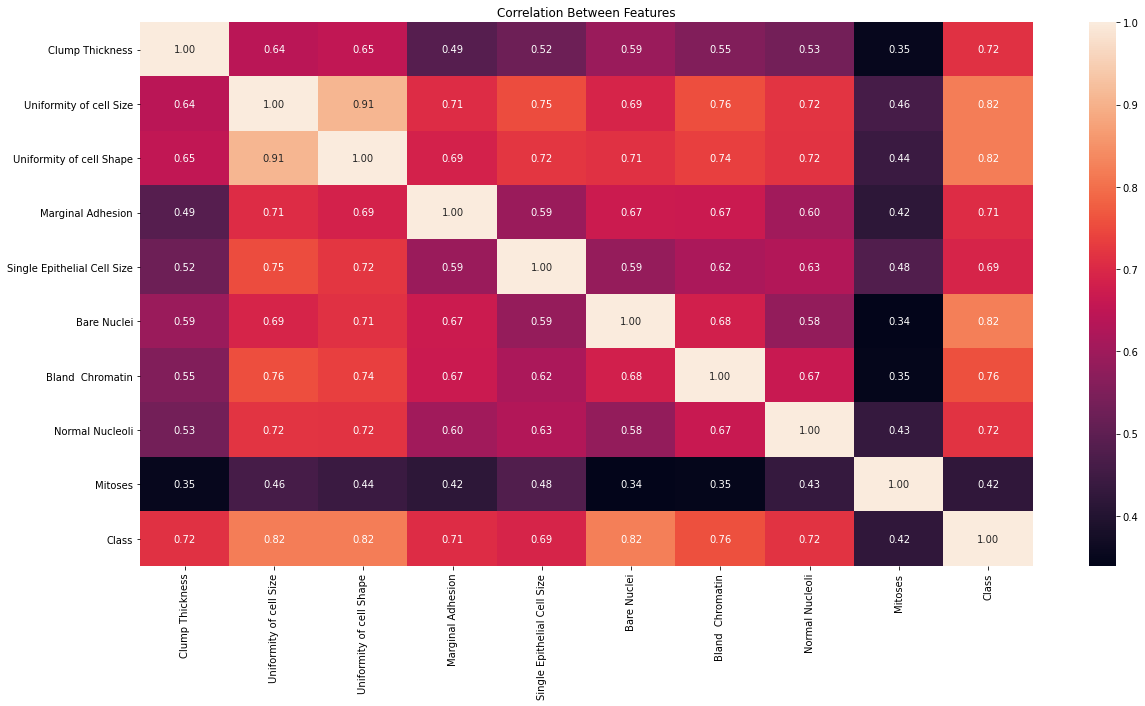

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

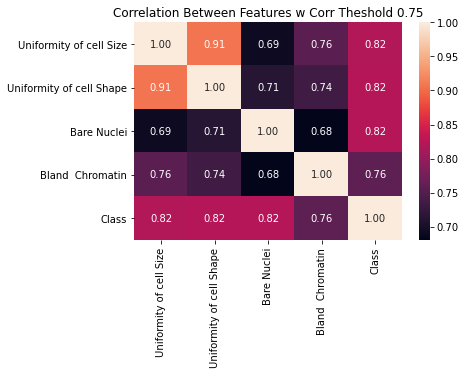

In [19]:
threshold = 0.75 
filtre = np.abs(corr_mat["Class"]) > threshold 
corr_features = corr_mat.columns[filtre].tolist()
sns.heatmap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

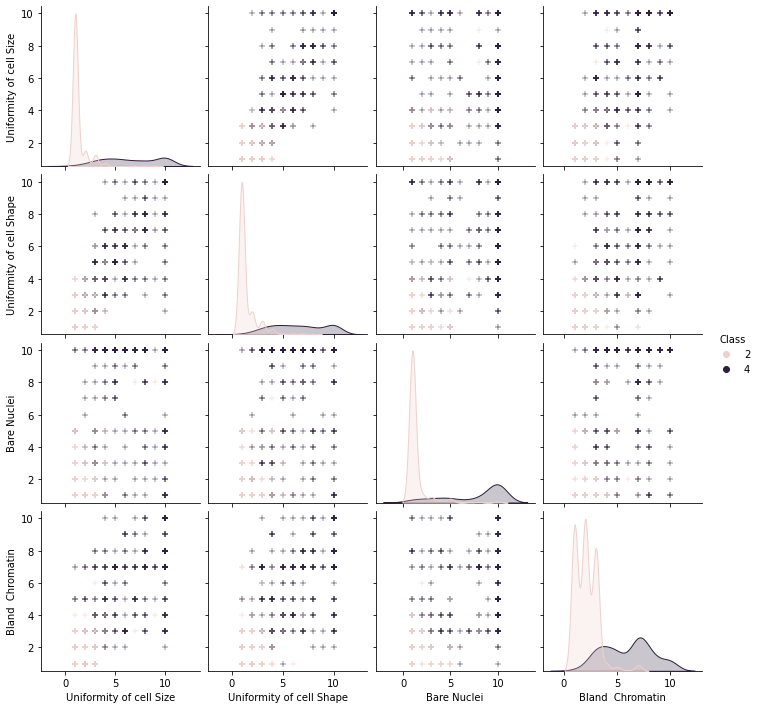

In [20]:
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "Class")
plt.show()

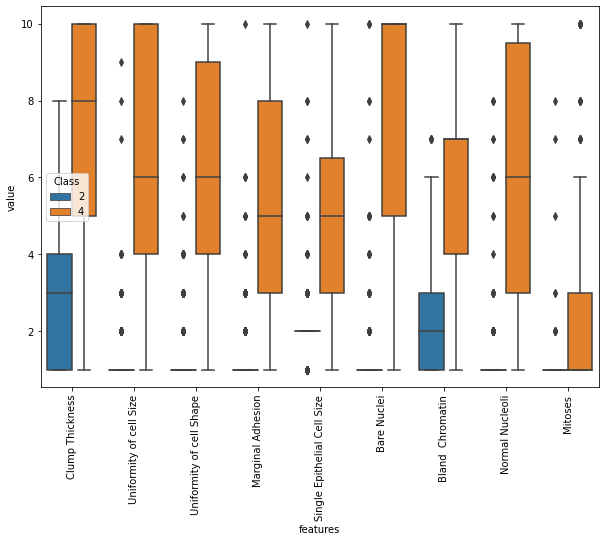

In [21]:
data_melted = pd.melt(df, id_vars = "Class",
                      var_name = "features",
                      value_name = "value")


plt.figure(figsize=(10,7))
sns.boxplot(x = "features", y = "value", hue = "Class", data = data_melted)
plt.xticks(rotation = 90) 
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [23]:
X=df.drop('Class',axis=1)
y=df['Class']

In [24]:
scaler=MinMaxScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)

In [25]:
pca_model=PCA(n_components=2)
pca_model.fit(scaled_data)
x_pca=pca_model.transform(scaled_data)

In [26]:
scaled_data.shape

(682, 9)

In [27]:
x_pca.shape

(682, 2)

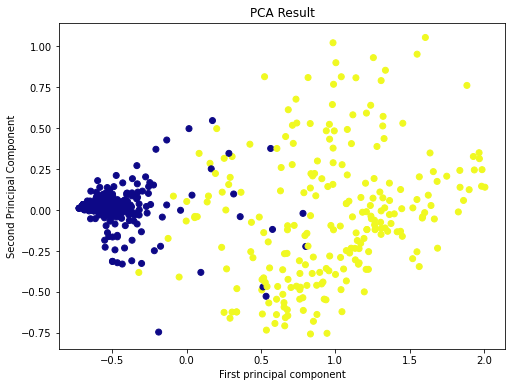

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Class'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.show()

In [29]:
comp=pca_model.components_
comp.shape

(2, 9)

In [30]:
df_comp=pd.DataFrame(pca_model.components_,columns=df.drop('Class',axis=1).columns)
df_comp.head()

,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.297011,0.403923,0.392696,0.331149,0.249722,0.442533,0.292197,0.354495,0.124569
1,-0.073577,0.229930,0.164701,-0.098171,0.200218,-0.780559,0.008476,0.469204,0.188071


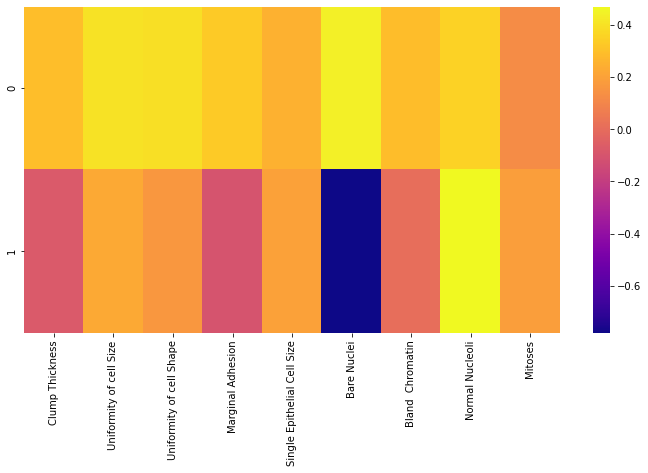

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

Choosing correct number of n component

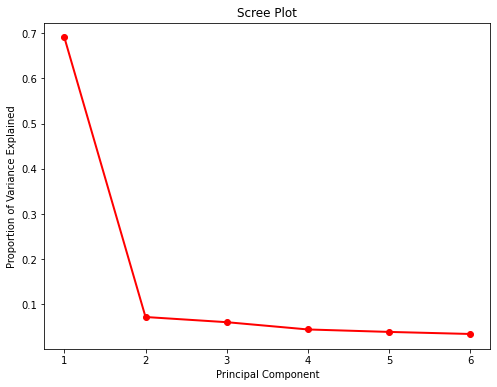

In [32]:
pca_model=PCA(n_components=6)
pca_model.fit(scaled_data)

plt.figure(figsize=(8,6))
PC_values = np.arange(pca_model.n_components_) + 1
plt.plot(PC_values, pca_model.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [33]:
print ("Proportion of Variance Explained : ", pca_model.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca_model.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.69045274 0.07198823 0.06052982 0.04444322 0.03901271 0.03444778]
Cumulative Prop. Variance Explained:  [0.69045274 0.76244097 0.82297079 0.86741401 0.90642672 0.9408745 ]


In [34]:
print(pca_model.explained_variance_) 

[0.60604753 0.06318794 0.05313028 0.0390102  0.03424356 0.03023667]


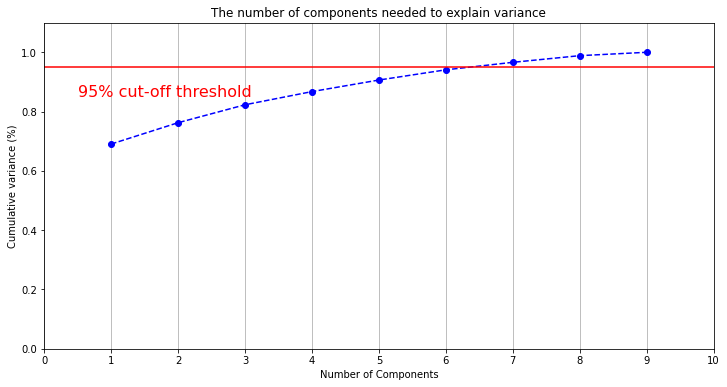

In [35]:
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In this case, to get 95% of variance explained I need 6 principal components.

K-Mean Clusturing

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)
kmeans.cluster_centers_

array([[0.22787611, 0.03318584, 0.04768928, 0.03933137, 0.12168142,
        0.03539823, 0.12118977, 0.02900688, 0.01253687],
       [0.68599034, 0.64444444, 0.63719807, 0.52657005, 0.49758454,
        0.77004831, 0.56763285, 0.55990338, 0.17439614]])

In [37]:
def converter(cluster):
    if cluster==2:
        return 1
    else:
        return 0

In [38]:
type(df['Class'][0])

numpy.int64

In [39]:
df['Class']=df['Class'].apply(converter)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Class'],kmeans.labels_))
print(classification_report(df['Class'],kmeans.labels_))

[[ 18 221]
 [434   9]]
              precision    recall  f1-score   support

           0       0.04      0.08      0.05       239
           1       0.04      0.02      0.03       443

    accuracy                           0.04       682
   macro avg       0.04      0.05      0.04       682
weighted avg       0.04      0.04      0.04       682



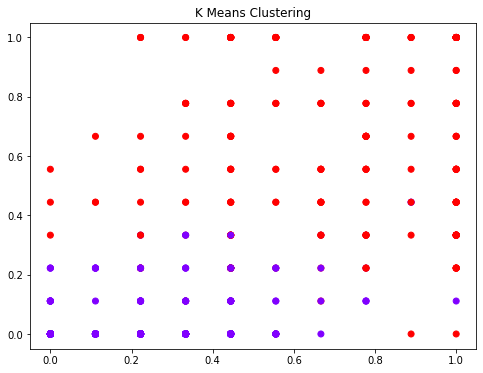

In [42]:
plt.figure(figsize=(8,6))
plt.title('K Means Clustering')
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=kmeans.labels_,cmap='rainbow')
plt.show()

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
kmeans.cluster_centers_

array([[0.69371981, 0.41449275, 0.44541063, 0.38647343, 0.35072464,
        0.79903382, 0.43864734, 0.32173913, 0.08115942],
       [0.21516755, 0.02796674, 0.04031242, 0.03502142, 0.11791383,
        0.03023432, 0.11740993, 0.02469136, 0.00781053],
       [0.68342152, 0.81922399, 0.78659612, 0.62698413, 0.61199295,
        0.69753086, 0.65961199, 0.74603175, 0.26190476]])

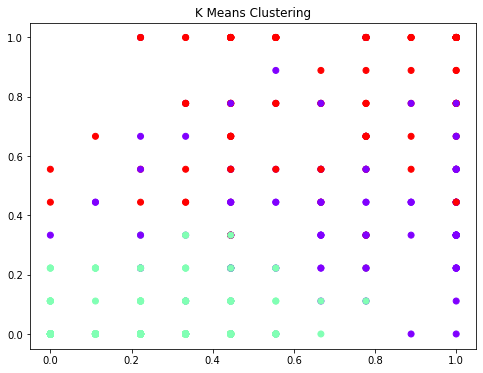

In [44]:
plt.figure(figsize=(8,6))
plt.title('K Means Clustering')
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=kmeans.labels_,cmap='rainbow')
plt.show()

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data)
kmeans.cluster_centers_

array([[0.73041894, 0.73041894, 0.67759563, 0.38433515, 0.56102004,
        0.29143898, 0.5154827 , 0.68852459, 0.14936248],
       [0.41830065, 0.05763518, 0.07902555, 0.06951872, 0.13250149,
        0.04159239, 0.13131313, 0.04812834, 0.01841949],
       [0.63105413, 0.81623932, 0.82051282, 0.75356125, 0.63247863,
        0.92592593, 0.70655271, 0.75783476, 0.30769231],
       [0.08684547, 0.01234568, 0.02000851, 0.01575138, 0.10855683,
        0.02852278, 0.11196254, 0.00723712, 0.00851426],
       [0.69590643, 0.43157895, 0.4502924 , 0.41637427, 0.34502924,
        0.9251462 , 0.47368421, 0.31461988, 0.07368421]])

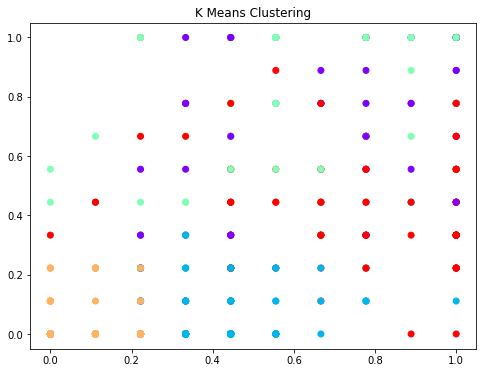

In [46]:
plt.figure(figsize=(8,6))
plt.title('K Means Clustering')
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=kmeans.labels_,cmap='rainbow')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score

num_clusters = np.arange(2,10)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(scaled_data)
    predictions = model.predict(scaled_data)
    results[size] = silhouette_score(scaled_data, predictions)

best_size = max(results, key=results.get)

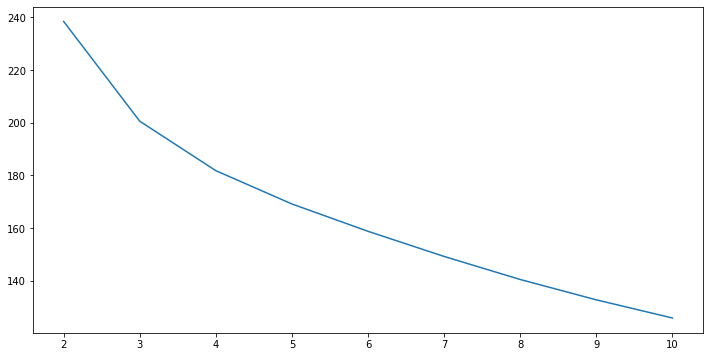

In [48]:
from scipy.spatial.distance import cdist, pdist,euclidean
k_range=np.arange(2,11)

k_means_var = [KMeans(n_clusters = k).fit(scaled_data) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(scaled_data, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Calculate within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# Visualize the elbow method for determining k
plt.plot(k_range, wcss)
plt.show()

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
kmeans.cluster_centers_

array([[0.21516755, 0.02796674, 0.04031242, 0.03502142, 0.11791383,
        0.03023432, 0.11740993, 0.02469136, 0.00781053],
       [0.67570009, 0.82565492, 0.79403794, 0.63504968, 0.61698284,
        0.6928636 , 0.66214995, 0.74074074, 0.26558266],
       [0.70150659, 0.4180791 , 0.44632768, 0.38418079, 0.35216573,
        0.80131827, 0.44161959, 0.33804143, 0.0819209 ]])

In [51]:
def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    print(n_cluster)
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

    return(np.max(db) / n_cluster)

In [52]:
def find_davies_bouldin(k,data):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  return DaviesBouldin(scaled_data,kmeans.labels_)

In [68]:
k_value=np.arange(2,11)
davies_boludin=[find_davies_bouldin(X,scaled_data) for X in k_value]

In [69]:
result_df=pd.DataFrame({"Clusters":np.arange(2,11),"Centroid":centroids,"Davies_boludin":davies_boludin})

In [70]:
result_df.set_index('Clusters',inplace=True)
result_df

,Centroid,Davies_boludin
Clusters,,
2,"[[0.22787610619469062, 0.033185840707963765, 0...",0.378646
3,"[[0.2151675485008822, 0.027966742252455684, 0....",0.635471
4,"[[0.21743512219702735, 0.02721088435374064, 0....",0.456962
5,"[[0.6895761741122567, 0.42840778923253153, 0.4...",0.385314
6,"[[0.4183006535947713, 0.057635175282233775, 0....",0.303293
7,"[[0.02808302808302726, 0.014041514041514103, 0...",0.290582
8,"[[0.7809523809523811, 0.7619047619047619, 0.70...",0.222237
9,"[[0.4076305220883534, 0.03681392235609063, 0.0...",0.188047
10,"[[0.3441734417344174, 0.0289069557362244, 0.04...",0.160882


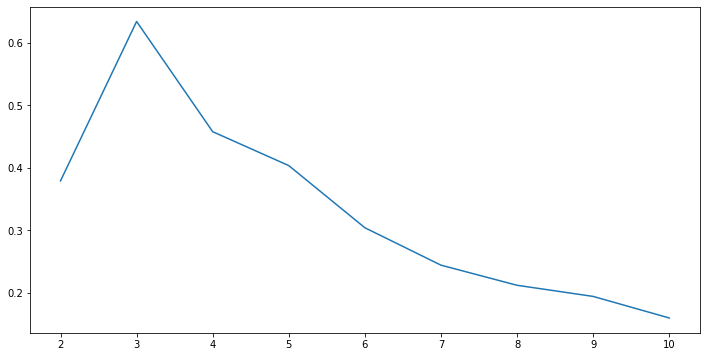

In [56]:
plt.plot(result_df.drop('Centroid',axis=1))

In [57]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [61]:
def find_purity_score(k,data):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  return purity_score(df['Class'],kmeans.labels_)

In [71]:
purity_val=[find_purity_score(X,scaled_data) for X in range(2,11)]
result_df['Purity_score']=purity_val
result_df

,Centroid,Davies_boludin,Purity_score
Clusters,,,
2,"[[0.22787610619469062, 0.033185840707963765, 0...",0.378646,0.960411
3,"[[0.2151675485008822, 0.027966742252455684, 0....",0.635471,0.970674
4,"[[0.21743512219702735, 0.02721088435374064, 0....",0.456962,0.967742
5,"[[0.6895761741122567, 0.42840778923253153, 0.4...",0.385314,0.963343
6,"[[0.4183006535947713, 0.057635175282233775, 0....",0.303293,0.963343
7,"[[0.02808302808302726, 0.014041514041514103, 0...",0.290582,0.963343
8,"[[0.7809523809523811, 0.7619047619047619, 0.70...",0.222237,0.963343
9,"[[0.4076305220883534, 0.03681392235609063, 0.0...",0.188047,0.972141
10,"[[0.3441734417344174, 0.0289069557362244, 0.04...",0.160882,0.970674


If the purity is close to 1,this means that we have chosen correct k value and the cluster can be used for classification as the varience is correctly explained.

In [ ]:
Assignment done by : Afham Fardeen
mail : afhamfardeen98@gmail.com